# Chapter 6 Homework

In [43]:
#Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import math
from pathlib import Path
import seaborn as sns
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, BayesianRidge
import statsmodels.api as sm
import statsmodels.formula.api as smf
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [3]:
# Directory
working_directory = os.getcwd()
print(working_directory)

/Users/pouyasohrab


In [4]:
# Defining the Data Frame
path = working_directory + '/dmba/Airfares.csv'
df = pd.read_csv(path)

# Analyze the Data Frame

In [5]:
df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [6]:
df.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [7]:
df.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [8]:
df.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


In [9]:
df.isna()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
635,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
636,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 6.3

In [10]:
# 6.3
# A.

# Cmatrix

cmatrix = df.corr(numeric_only = True)

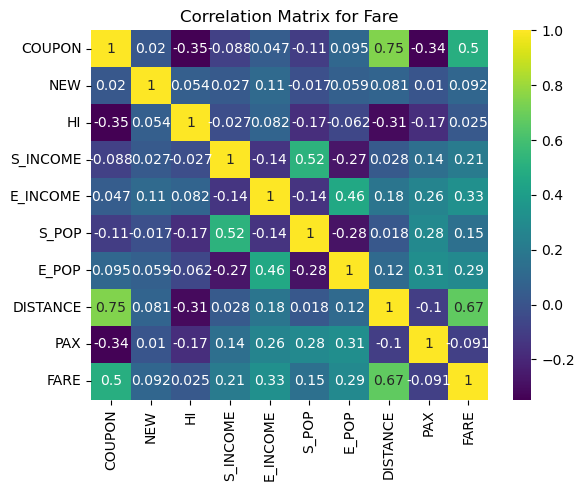

In [14]:
# Plot of Cmatrix Heatmap

sns.heatmap(cmatrix, cmap='viridis', annot=True)

plt.title('Correlation Matrix for Fare')

plt.show()

In [15]:
# Get numerical variables

numerical_vars = df.select_dtypes(include=['int', 'float'])
print(numerical_vars)

     COUPON  NEW       HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
0      1.00    3  5291.99   28637.0   21112.0  3036732   205711       312   
1      1.06    3  5419.16   26993.0   29838.0  3532657  7145897       576   
2      1.06    3  9185.28   30124.0   29838.0  5787293  7145897       364   
3      1.06    3  2657.35   29260.0   29838.0  7830332  7145897       612   
4      1.06    3  2657.35   29260.0   29838.0  7830332  7145897       612   
..      ...  ...      ...       ...       ...      ...      ...       ...   
633    1.08    3  2216.70   32991.0   37375.0  8621121   991717      1030   
634    1.08    0  2216.70   32991.0   37375.0  8621121   991717      1030   
635    1.17    3  6797.80   27994.0   37375.0  4948339   991717       960   
636    1.28    3  5566.43   31981.0   37375.0  4549784   991717       858   
637    1.28    3  5566.43   31981.0   37375.0  4549784   991717       858   

       PAX    FARE  
0     7864   64.11  
1     8820  174.47  
2     6452  

# Scatterplots of Numerical Predictors

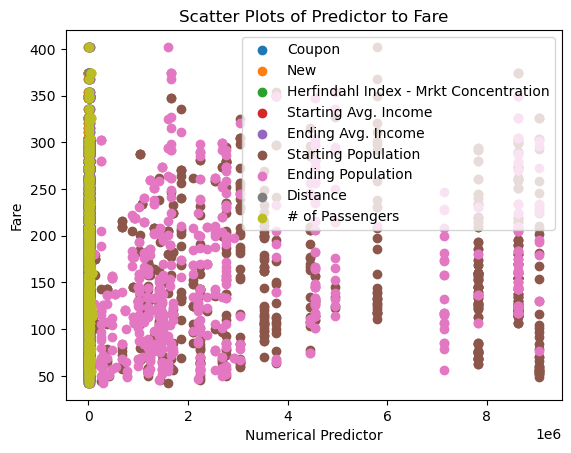

In [16]:
# Scatterplots of Numerical Predictors

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as plt

plt.scatter(df['COUPON'], df['FARE'], label = 'Coupon')
plt.scatter(df['NEW'], df['FARE'], label = 'New')
plt.scatter(df['HI'], df['FARE'], label = 'Herfindahl Index - Mrkt Concentration')
plt.scatter(df['S_INCOME'], df['FARE'], label = 'Starting Avg. Income')
plt.scatter(df['E_INCOME'], df['FARE'], label = 'Ending Avg. Income')
plt.scatter(df['S_POP'], df['FARE'], label = 'Starting Population')
plt.scatter(df['E_POP'], df['FARE'], label = 'Ending Population')
plt.scatter(df['DISTANCE'], df['FARE'], label = 'Distance')
plt.scatter(df['PAX'], df['FARE'], label = '# of Passengers')

plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

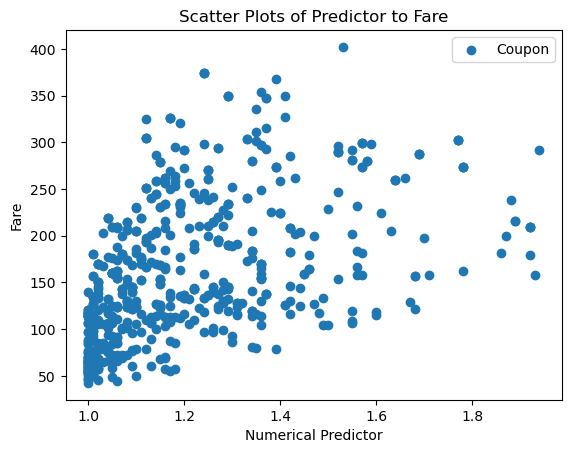

In [18]:
# Scatterplots of Numerical Predictors

plt.scatter(df['COUPON'], df['FARE'], label = 'Coupon')


plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

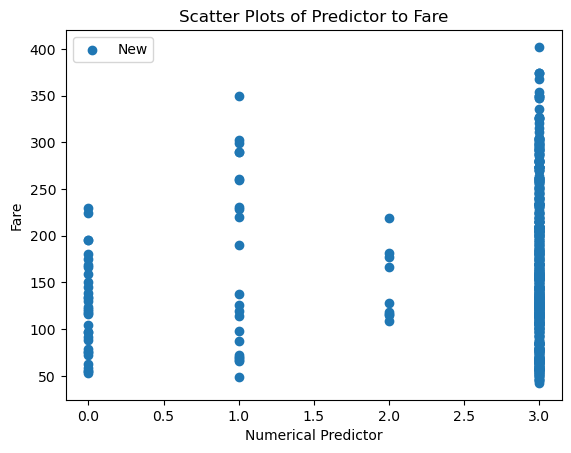

In [19]:
# Scatterplots of Numerical Predictors

plt.scatter(df['NEW'], df['FARE'], label = 'New')


plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

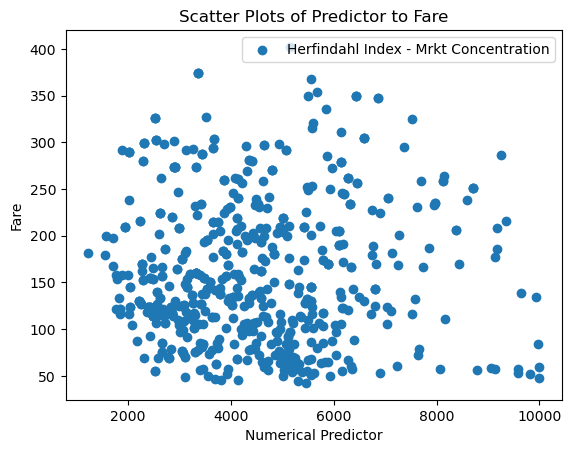

In [20]:
# Scatterplots of Numerical Predictors


plt.scatter(df['HI'], df['FARE'], label = 'Herfindahl Index - Mrkt Concentration')


plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

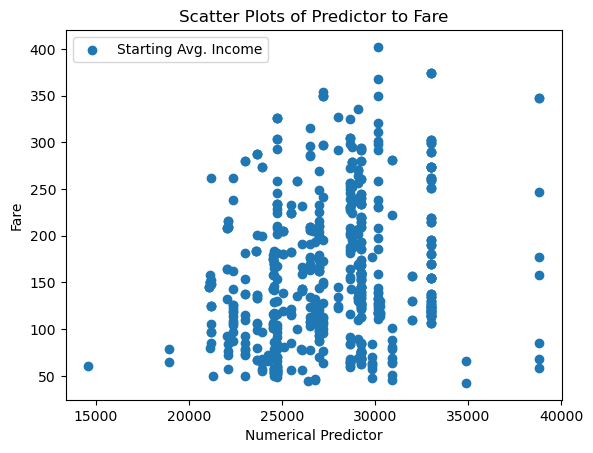

In [21]:
# Scatterplots of Numerical Predictors


plt.scatter(df['S_INCOME'], df['FARE'], label = 'Starting Avg. Income')


plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

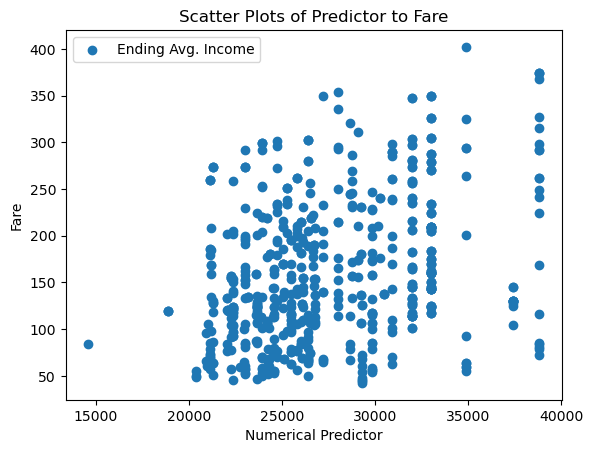

In [22]:
# Scatterplots of Numerical Predictors


plt.scatter(df['E_INCOME'], df['FARE'], label = 'Ending Avg. Income')

plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

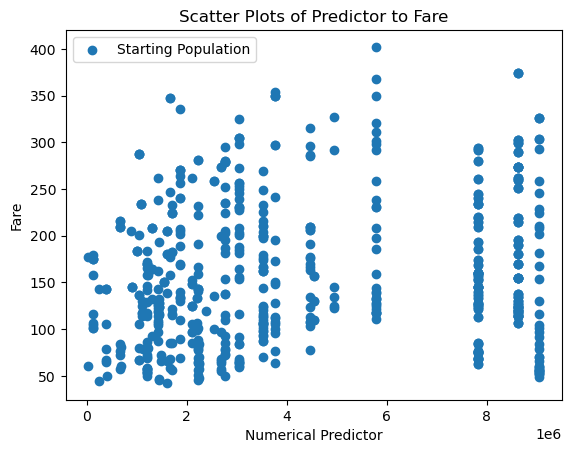

In [23]:
# Scatterplots of Numerical Predictors


plt.scatter(df['S_POP'], df['FARE'], label = 'Starting Population')


plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

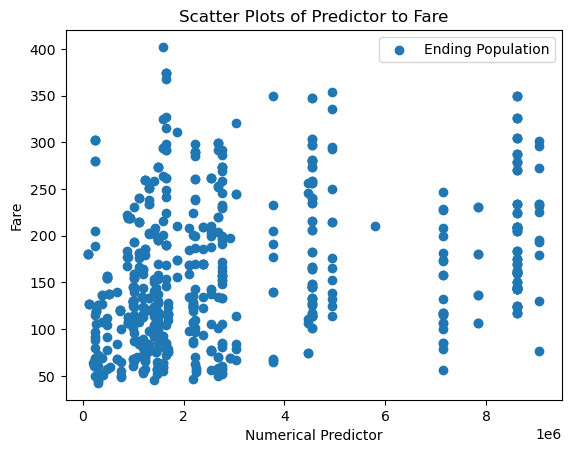

In [24]:
# Scatterplots of Numerical Predictors


plt.scatter(df['E_POP'], df['FARE'], label = 'Ending Population')


plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

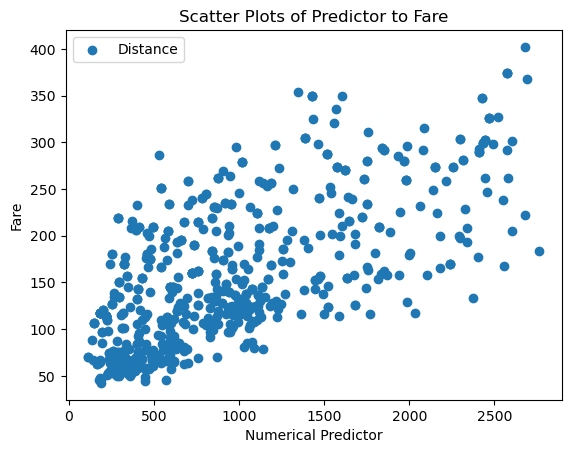

In [25]:
# Scatterplots of Numerical Predictors


plt.scatter(df['DISTANCE'], df['FARE'], label = 'Distance')


plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

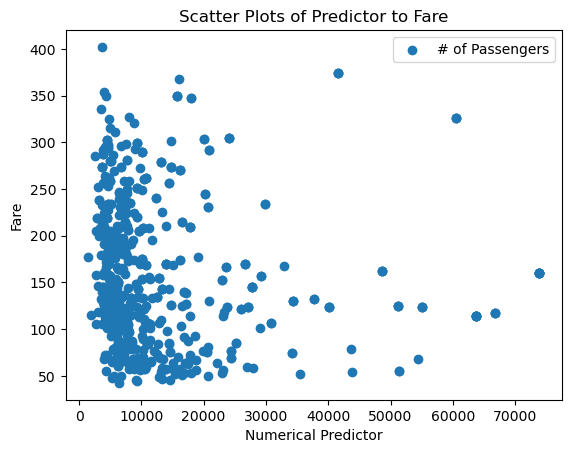

In [29]:
# Scatterplots of Numerical Predictors


plt.scatter(df['PAX'], df['FARE'], label = '# of Passengers')

plt.xlabel('Numerical Predictor')
plt.ylabel('Fare')
plt.title('Scatter Plots of Predictor to Fare')
plt.legend()

plt.show()

<Figure size 1200x800 with 0 Axes>

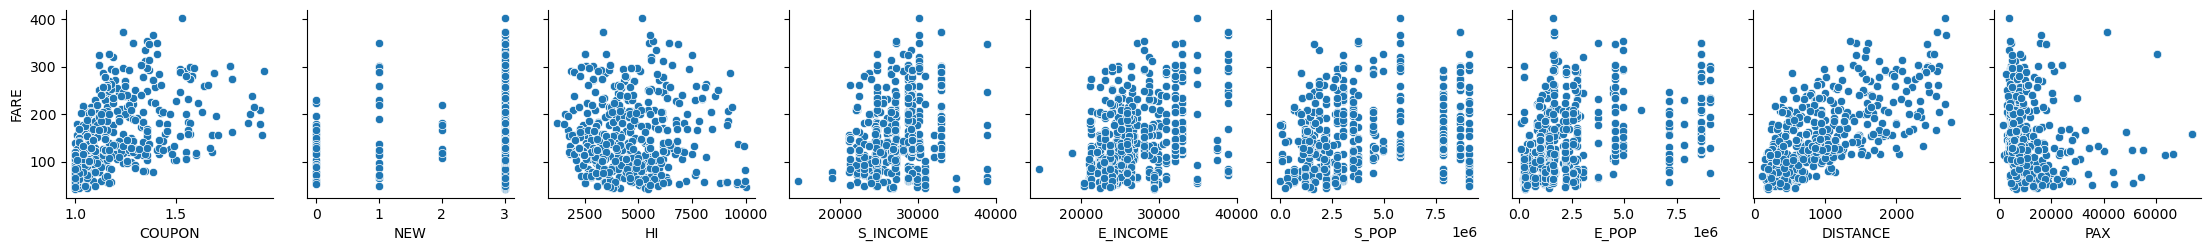

In [30]:
# Alternative Scatterplots of Numerical Predictors

numerical_predictors = ['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX']

plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=numerical_predictors, y_vars=['FARE'])

plt.show()

# Best Numerical Predictor of Fare seems to be Coupon and Distance.

In [35]:
# Get Categorical Variables
cat_vars = df.select_dtypes(include=['object'])
print(cat_vars)

    S_CODE                  S_CITY E_CODE                  E_CITY VACATION  \
0        *  Dallas/Fort Worth   TX      *  Amarillo            TX       No   
1        *  Atlanta             GA      *  Baltimore/Wash Intl MD       No   
2        *  Boston              MA      *  Baltimore/Wash Intl MD       No   
3      ORD  Chicago             IL      *  Baltimore/Wash Intl MD       No   
4      MDW  Chicago             IL      *  Baltimore/Wash Intl MD       No   
..     ...                     ...    ...                     ...      ...   
633    LGA  New York/Newark     NY      *  West Palm Beach     FL      Yes   
634    EWR  New York/Newark     NY      *  West Palm Beach     FL      Yes   
635      *  Philadelphia/Camden PA      *  West Palm Beach     FL      Yes   
636    IAD  Washington          DC      *  West Palm Beach     FL      Yes   
637    DCA  Washington          DC      *  West Palm Beach     FL      Yes   

      SW        SLOT         GATE  
0    Yes        Free       

In [36]:
# Specify the desired categorical predictor columns
categorical_predictors = ['VACATION', 'SW', 'SLOT', 'GATE']

In [37]:
# 6.3
# B.

piv = pd.pivot_table(df, values=['FARE'], index=categorical_predictors,
                       aggfunc={'FARE': np.mean})
piv

FARE
VACATION SW  SLOT       GATE                   
No       No  Controlled Constrained  206.797778
                        Free         208.329825
             Free       Constrained  210.581667
                        Free         196.183782
         Yes Controlled Constrained   74.280000
                        Free         110.170588
             Free       Constrained  139.960000
                        Free          96.951491
Yes      No  Controlled Free         139.901786
             Free       Constrained  137.313500
                        Free         143.976716
         Yes Controlled Free         131.605000
             Free       Free          89.811176

The best categorical predictor for predicting FARE is SW


# 6.3
# C.

In [38]:
df.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [39]:
predictors = ['COUPON', 'NEW', 'VACATION','SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE','DISTANCE', 'PAX']
outcome = 'FARE'

# partition data
x = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [40]:
x

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,0,1,1,1
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,0,0,1,1
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,0,0,1,1
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,0,1,0,1
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,1.08,3,2216.70,32991.0,37375.0,8621121,991717,1030,34324,1,0,0,1
634,1.08,0,2216.70,32991.0,37375.0,8621121,991717,1030,34324,1,0,1,0
635,1.17,3,6797.80,27994.0,37375.0,4948339,991717,960,6016,1,0,1,1
636,1.28,3,5566.43,31981.0,37375.0,4549784,991717,858,4877,1,0,1,1


In [41]:
# Create the Model

fare_lm = LinearRegression()
fare_lm.fit(train_x, train_y)

# Coefficients
print('intercept ', fare_lm.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'Coefficient': fare_lm.coef_}))

# print performance measures (training data)
regressionSummary(train_y, fare_lm.predict(train_x))

intercept  52.97284313388634
       Predictor  Coefficient
0         COUPON   -11.744039
1            NEW    -2.508229
2             HI     0.006876
3       S_INCOME     0.000626
4       E_INCOME     0.001247
5          S_POP     0.000004
6          E_POP     0.000004
7       DISTANCE     0.077822
8            PAX    -0.000916
9   VACATION_Yes   -35.206099
10        SW_Yes   -42.157140
11     SLOT_Free   -13.533183
12     GATE_Free   -21.185849

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.7664
            Mean Absolute Error (MAE) : 27.1065
          Mean Percentage Error (MPE) : -4.5089
Mean Absolute Percentage Error (MAPE) : 20.0849


In [44]:
# 6.3
# C.
# ii.

# StepWise Regression

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = stepwise_selection(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

# 10 Variables outputted

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=4379.42, constant
Step: score=4149.88, add DISTANCE
Step: score=4025.89, add SW_Yes
Step: score=3913.59, add VACATION_Yes
Step: score=3890.27, add HI
Step: score=3873.33, add GATE_Free
Step: score=3852.81, add SLOT_Free
Step: score=3850.30, add PAX
Step: score=3844.58, add E_POP
Step: score=3826.43, add S_POP
Step: score=3821.88, add E_INCOME
Step: score=3821.88, unchanged None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'GATE_Free', 'SLOT_Free', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']


In [45]:
# 6.3
# C.
# iii.

# Exhaustive Search

def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_x[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)
allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model)
data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_x[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))


## 11 Predictors Outputted
# 'DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free', 'HI', 'PAX', 'SLOT_Free', 'SW_Yes', 'S_INCOME', 'VACATION_Yes', 'S_POP' 

,n,r2adj,AIC,COUPON,DISTANCE,E_INCOME,E_POP,GATE_Free,HI,NEW,PAX,SLOT_Free,SW_Yes,S_INCOME,S_POP,VACATION_Yes
0,1,0.453107,4149.881509,False,True,False,False,False,False,False,False,False,False,False,False,False
1,2,0.605715,4025.892420,False,True,False,False,False,False,False,False,False,True,False,False,False
2,3,0.706909,3913.585125,False,True,False,False,False,False,False,False,False,True,False,False,True
3,4,0.724977,3890.268211,False,True,False,False,False,True,False,False,False,True,False,False,True
4,5,0.737584,3873.328296,False,True,False,False,True,True,False,False,False,True,False,False,True
5,6,0.751947,3852.808698,False,True,False,False,True,True,False,False,True,True,False,False,True
6,7,0.758747,3843.170960,False,True,False,True,False,True,False,True,False,True,False,True,True
7,8,0.765105,3833.945866,False,True,False,True,True,True,False,True,False,True,False,True,True
8,9,0.770266,3826.433471,False,True,False,True,True,True,False,True,True,True,False,True,True
9,10,0.773567,3821.876901,False,True,True,True,True,True,False,True,True,True,False,True,True


# Compare the Models and Refit

In [46]:
# Stepwise Model

predictors = ['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'GATE_Free', 'SLOT_Free', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']
outcome = 'FARE'
x = train_x[predictors]
y = train_y

# fit the regression model y on x
stepwise_lm = LinearRegression()
stepwise_lm.fit(x,y)

# print coefficients
print('intercept ', stepwise_lm.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': stepwise_lm.coef_}))

# print performance measures (training set)
print("\nModel performance on training data:")
regressionSummary(train_y, stepwise_lm.predict(train_x[predictors]))

# predict prices in validation set, print first few predicted/actual values and residuals
stepwise_lm_pred = stepwise_lm.predict(valid_x[predictors])

# print performance measures (validation set)
print("\nModel performance on validation data:")
regressionSummary(valid_y, stepwise_lm_pred)

intercept  52.89100012896367
      Predictor  coefficient
0      DISTANCE     0.075558
1        SW_Yes   -43.031272
2  VACATION_Yes   -35.865596
3            HI     0.007188
4     GATE_Free   -21.410803
5     SLOT_Free   -13.915304
6           PAX    -0.000829
7         E_POP     0.000004
8         S_POP     0.000004
9      E_INCOME     0.001148

Model performance on training data:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.8867
            Mean Absolute Error (MAE) : 27.1374
          Mean Percentage Error (MPE) : -4.5313
Mean Absolute Percentage Error (MAPE) : 20.1672

Model performance on validation data:

Regression statistics

                      Mean Error (ME) : -1.8591
       Root Mean Squared Error (RMSE) : 36.1129
            Mean Absolute Error (MAE) : 28.5252
          Mean Percentage Error (MPE) : -6.7084
Mean Absolute Percentage Error (MAPE) : 21.7198


In [47]:
# Exhaustive Model

predictors2 = ['DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free', 'HI', 'PAX', 'SLOT_Free', 'SW_Yes', 'S_INCOME', 'VACATION_Yes', 'S_POP']
outcome = 'FARE'
x = train_x[predictors2]
y = train_y

# fit the regression model y on x
exhaustive_lm = LinearRegression()
exhaustive_lm.fit(x,y)

# print coefficients
print('intercept ', exhaustive_lm.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': exhaustive_lm.coef_}))

# print performance measures (training set)
print("\nModel performance on training data:")
regressionSummary(train_y, exhaustive_lm.predict(train_x[predictors2]))

# predict prices in validation set, print first few predicted/actual values and residuals
exhaustive_lm_pred = exhaustive_lm.predict(valid_x[predictors2])

# print performance measures (validation set)
print("\nModel performance on validation data:")
regressionSummary(valid_y, exhaustive_lm_pred)

intercept  31.378580298073132
       Predictor  coefficient
0       DISTANCE     0.075241
1       E_INCOME     0.001229
2          E_POP     0.000004
3      GATE_Free   -20.964865
4             HI     0.007133
5            PAX    -0.000857
6      SLOT_Free   -13.113731
7         SW_Yes   -41.642117
8       S_INCOME     0.000662
9   VACATION_Yes   -34.656294
10         S_POP     0.000004

Model performance on training data:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.8374
            Mean Absolute Error (MAE) : 27.1222
          Mean Percentage Error (MPE) : -4.5171
Mean Absolute Percentage Error (MAPE) : 20.1519

Model performance on validation data:

Regression statistics

                      Mean Error (ME) : -1.8424
       Root Mean Squared Error (RMSE) : 35.9030
            Mean Absolute Error (MAE) : 28.3317
          Mean Percentage Error (MPE) : -6.6938
Mean Absolute Percentage Error (MAPE) : 21.4834


# Comparison

From the comparison, it appears that Model 2 performs slightly better than Model 1 on both the training and validation data. It has slightly lower RMSE, MAE, and MAPE values, indicating better accuracy and lower errors in predicting fare values. However, the differences between the two models are relatively small, so further analysis and evaluation might be needed to make a more definitive conclusion.

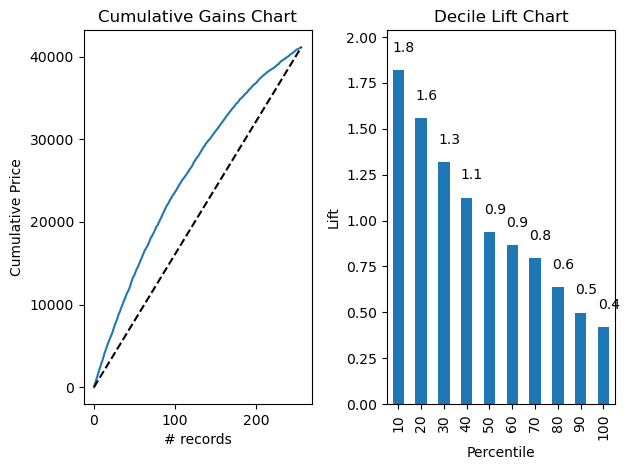

In [51]:
# Lift Charts

df = pd.DataFrame({
    'predicted': stepwise_lm.predict(valid_x[predictors]),
    'actual': valid_y, 
})
df = df.sort_values(by=['predicted'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(df['actual'], ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(df['actual'], ax=axes[1], labelBars=True)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

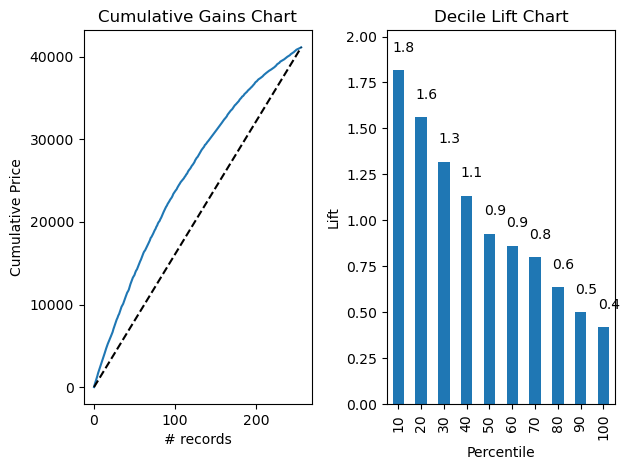

In [52]:
# Lift Charts
df = pd.DataFrame({
    'predicted': exhaustive_lm.predict(valid_x[predictors2]),
    'actual': valid_y, 
})
df = df.sort_values(by=['predicted'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(df['actual'], ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(df['actual'], ax=axes[1], labelBars=True)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

# 6.3
# C.
# V.

# Predict Average Fare

In [55]:
# V.

new_data = pd.DataFrame({
    'DISTANCE': [1976],
    'E_INCOME': [27664],
    'E_POP': [3195503],
    'GATE_Free': [1],
    'HI': [4442.141],
    'PAX': [12782],
    'SLOT_Free': [1],
    'SW_Yes': [0],
    'S_INCOME': [28760],
    'VACATION_Yes': [0],
    'S_POP': [4557004]
})

# Reorder
new_data = new_data[predictors2]

# Predict
predicted_fare = exhaustive_lm.predict(new_data)


print("Predicted Average Fare:", predicted_fare[0])

Predicted Average Fare: 251.6309646108961


In [56]:
# VI

new_data = pd.DataFrame({
    'DISTANCE': [1976],
    'E_INCOME': [27664],
    'E_POP': [3195503],
    'GATE_Free': [1],
    'HI': [4442.141],
    'PAX': [12782],
    'SLOT_Free': [1],
    'SW_Yes': [1],
    'S_INCOME': [28760],
    'VACATION_Yes': [0],
    'S_POP': [4557004]
})

# Reorder
new_data = new_data[predictors2]

# Predict
predicted_fare = exhaustive_lm.predict(new_data)

# Print
print("Predicted Average Fare:", predicted_fare[0])

Predicted Average Fare: 209.9888473552338


Reduction in Average Fare with Southwest Coverage: 41.6421172556623

# 6.3
# C.
# VII.

I believe that PAX and HI would not be available for predicting from a new airport since these are variables based on the established route which can not account for the new airport in its calculations yet. The others can be calculated or determined since they do not depend on potential proposed flights of the new airport or just by knowing the airport's policies beforehand (i.e.: Coupon, SW, Population, Income, Vacation, Slot, Gate)

# Remake model using Exhaustive Search without the variables 'PAX' and 'HI'

In [58]:
#Directory

path = working_directory + '/dmba/Airfares.csv'
df3 = pd.read_csv(path)

In [59]:
predictors = ['COUPON', 'NEW', 'VACATION','SW', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE','DISTANCE',]
outcome = 'FARE'

# partition data
x = pd.get_dummies(df3[predictors], drop_first=True)
y = df3[outcome]

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

# Create the Model
fare_lm2 = LinearRegression()
fare_lm2.fit(train_x, train_y)

# Coefficients
print('intercept ', fare_lm2.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'Coefficient': fare_lm2.coef_}))

# print performance measures (training data)
regressionSummary(train_y, fare_lm2.predict(train_x))

intercept  105.73282055982715
       Predictor  Coefficient
0         COUPON    -3.009947
1            NEW    -1.293616
2       S_INCOME     0.000176
3       E_INCOME     0.001150
4          S_POP     0.000001
5          E_POP     0.000001
6       DISTANCE     0.073108
7   VACATION_Yes   -46.376784
8         SW_Yes   -49.227873
9      SLOT_Free    -9.943809
10     GATE_Free   -24.340305

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 38.0108
            Mean Absolute Error (MAE) : 30.1560
          Mean Percentage Error (MPE) : -5.3963
Mean Absolute Percentage Error (MAPE) : 21.8215


In [60]:
# Exhaustive Search

def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_x[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)
allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model)
data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_x[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))


# 8 Predictors Outputted
# 'DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free','SLOT_Free', 'SW_Yes', 'S_POP', 'VACATION_Yes' 

,n,r2adj,AIC,COUPON,DISTANCE,E_INCOME,E_POP,GATE_Free,NEW,SLOT_Free,SW_Yes,S_INCOME,S_POP,VACATION_Yes
0,1,0.453107,4149.881509,False,True,False,False,False,False,False,False,False,False,False
1,2,0.605715,4025.892420,False,True,False,False,False,False,False,True,False,False,False
2,3,0.706909,3913.585125,False,True,False,False,False,False,False,True,False,False,True
3,4,0.720403,3896.568278,False,True,False,False,True,False,False,True,False,False,True
4,5,0.727307,3888.002676,False,True,False,False,True,False,True,True,False,False,True
5,6,0.731941,3882.437877,False,True,True,False,True,False,True,True,False,False,True
6,7,0.731947,3883.409559,False,True,True,False,True,False,True,True,False,True,True
7,8,0.732393,3883.751454,False,True,True,True,True,False,True,True,False,True,True
8,9,0.731830,3885.527665,False,True,True,True,True,True,True,True,False,True,True
9,10,0.731168,3887.442315,False,True,True,True,True,True,True,True,True,True,True


In [61]:
# Exhaustive Model
predictors3 = ['DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free','SLOT_Free', 'SW_Yes', 'S_POP', 'VACATION_Yes']
outcome = 'FARE'
x = train_x[predictors3]
y = train_y

# fit the regression model y on x
exhaustive_lm2 = LinearRegression()
exhaustive_lm2.fit(x,y)


LinearRegression()

In [63]:
# 6.3
# C.
# ix.

new_data = pd.DataFrame({
    'DISTANCE': [1976],
    'E_INCOME': [27664],
    'E_POP': [3195503],
    'GATE_Free': [1],
    'SLOT_Free': [1],
    'SW_Yes': [0],
    'S_INCOME': [28760],
    'S_POP': [4557004],
    'VACATION_Yes': [0],

})

# Reorder
new_data = new_data[predictors3]

# Predict
predicted_fare = exhaustive_lm2.predict(new_data)

# Print
print("Predicted Average Fare:", predicted_fare[0])

Predicted Average Fare: 253.33678305560056


In [64]:
# print coefficients
print('intercept ', exhaustive_lm2.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': exhaustive_lm2.coef_}))

# print performance measures (training set)
print("\nModel performance on training data:")
regressionSummary(train_y, exhaustive_lm2.predict(train_x[predictors3]))

# predict prices in validation set, print first few predicted/actual values and residuals
exhaustive_lm2_pred = exhaustive_lm2.predict(valid_x[predictors3])

# print performance measures (validation set)
print("\nModel performance on validation data:")
regressionSummary(valid_y, exhaustive_lm2_pred)

intercept  104.5634934219821
      Predictor  coefficient
0      DISTANCE     0.072301
1      E_INCOME     0.001131
2         E_POP     0.000001
3     GATE_Free   -24.360262
4     SLOT_Free    -9.926091
5        SW_Yes   -49.438579
6         S_POP     0.000001
7  VACATION_Yes   -46.432000

Model performance on training data:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 38.0282
            Mean Absolute Error (MAE) : 30.1478
          Mean Percentage Error (MPE) : -5.3846
Mean Absolute Percentage Error (MAPE) : 21.8261

Model performance on validation data:

Regression statistics

                      Mean Error (ME) : -0.7325
       Root Mean Squared Error (RMSE) : 40.2183
            Mean Absolute Error (MAE) : 32.0458
          Mean Percentage Error (MPE) : -6.9949
Mean Absolute Percentage Error (MAPE) : 23.5795


# 6.3
# C.
# x.

Model 1 (iii) performs better than Model 2 (viii) in terms of prediction accuracy. It has a lower RMSE (35.9030) compared to Model 2 (40.2183), indicating that its predictions are closer to the actual values on average. The MAE of Model 1 (28.3317) is also lower than that of Model 2 (32.0458).

Both models have negative MPE values, indicating an underestimation of the fares. Although, Model 2 has a slightly higher MPE (-6.9949) compared to Model 1 (-6.6938). Furthermore, Model 2 has a higher MAPE (23.5795) compared to Model 1 (21.4834), indicating a larger average percentage deviation from the actual fares.

Based on these evaluations it is worthwhile reevaluating the model once flights begin on the new route.

# 6.3
# D.


If our objective shifts to wanting to evaluate Southwest's presence on the airline industry, our analysis would transition from predicting fares to evaluating and analyzing the effect Southwest's presence has on other active airlines in the industry.

Summarized by the following:

The first technical and conceptual aspect to consider is the pricing effect on other airlines. We would be analyzing and evaluating how the pricing strategy of Southwest affects other fare costs in the industry. Thereby, determining whether other airline companies need to alter their pricing strategy to remain competitive with Southwest's fares.

The next technical and conceptual aspect to consider is how Southwest's presence affects passenger volume for each airline. Thereby, evaluating each airline's market presence in the industry and how well they are performing in comparison to one another.

The next technical and conceptual aspect to consider is analyzing customer behavior with the presence of Southwest's pricing and emergence into the industry. There are many customers who are loyal to their airline due to points, credit card perks, or simply preferring a particular airline brand. Therefore, we should also analyze any shifts that occur as a result of Southwest entering the industry.

Furthermore, since all the airlines will be competing for customers and adjusting their pricing strategies to remain competitive, it is important to analyze the potential threat Southwest's entry has on already existing routes from other airlines. This can affect other airlines planning and potentially affect revenue and profitability as a result with another competitor entering the market and providing the same routes as they offer.

# 6.4

In [76]:
# 6.4

#Directory
path = working_directory + '/dmba/ToyotaCorolla.csv'
dff = pd.read_csv(path)

In [77]:
dff.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [80]:
# Create Model

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = 'Price'

# partition
X = pd.get_dummies(dff[predictors], drop_first=True)
y = dff[outcome]

# split data into training, validation, and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.375, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures on training data
regressionSummary(train_y, car_lm.predict(train_X))

# predict prices in the validation set
valid_predictions = car_lm.predict(valid_X)

# performance measures on validation data
regressionSummary(valid_y, valid_predictions)

intercept  9052.480855703707
           Predictor  coefficient
0          Age_08_04  -110.920519
1                 KM    -0.016965
2                 HP    28.754754
3          Automatic   566.993253
4              Doors   137.532431
5      Quarterly_Tax    19.596912
6      Mfr_Guarantee   203.030980
7   Guarantee_Period   103.821339
8              Airco    32.274890
9    Automatic_airco  3098.288781
10         CD_Player   280.627638
11   Powered_Windows   553.876735
12       Sport_Model   387.880094
13           Tow_Bar  -139.282038
14  Fuel_Type_Diesel  2119.546454
15  Fuel_Type_Petrol  2777.464882

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1147.1553
            Mean Absolute Error (MAE) : 872.9457
          Mean Percentage Error (MPE) : -0.9273
Mean Absolute Percentage Error (MAPE) : 8.6893

Regression statistics

                      Mean Error (ME) : 37.2378
       Root Mean Squared Error (RMSE) : 1322.4240
      

# 6.4
# A.

The three most important car specifications for predicting the car's price are indicated by the magnitudes of their coefficients:

1. Automatic_airco: This variable has the largest coefficient of 3098.2888. Thus, automatic air conditioning has a large positive effect on the car's price.

2. Fuel_Type_Petrol: The coefficient for this variable is 2777.4649. Thus, indicating that cars powered by petrol fuel tend to have higher prices compared to other fuel types.

3. Fuel_Type_Diesel: This variable has a coefficient of 2119.5465. Thus, signifying that this variable also plays an important role in predicting the price (diesel-powered cars generally command higher prices).

# 6.4
# B.

The model's performance in predicting prices on the validation set showed us a slight positive bias (ME = 37.2378) and moderate amount of prediction errors (RMSE = $1322.4240, MAE = $959.1751). The predictions of the model have a slight negative bias (MPE = -0.8657) and an average absolute percentage difference of approximately 9.22% (MAPE = 9.2158).

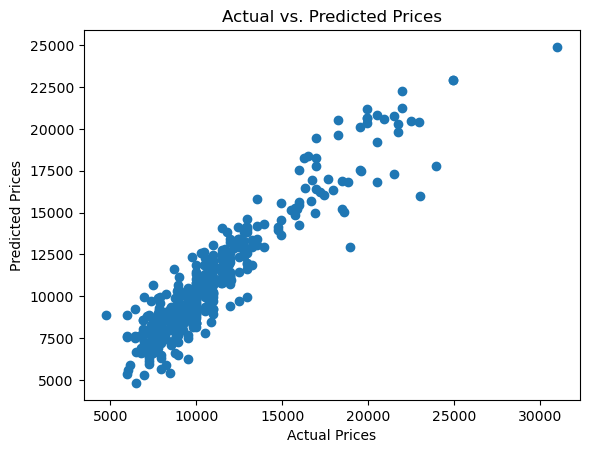

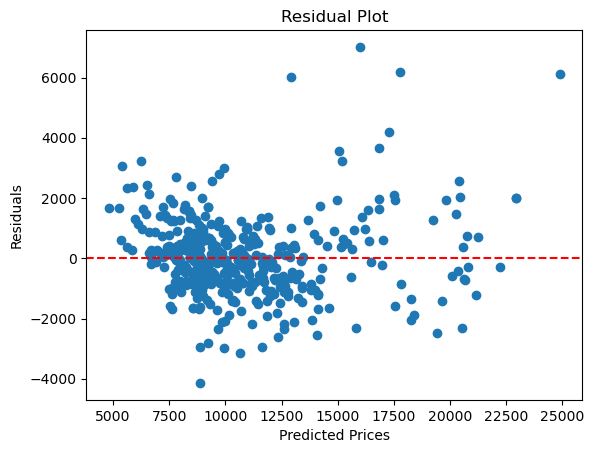

In [68]:
# scatter plot
plt.scatter(valid_y, car_lm.predict(valid_X))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')

plt.show()

# residual plot
residuals = valid_y - car_lm.predict(valid_X)
plt.scatter(car_lm.predict(valid_X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()


0.7865429234338747


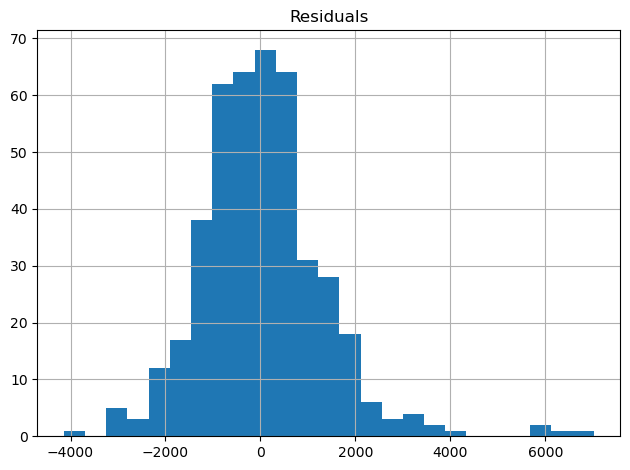

In [70]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.show()

Percentage of datapoints with a residual in [-1406, 1406] is roughly 78%